In [98]:
import  numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical,plot_model
from keras.models import Sequential
from keras.layers import Dense,Softmax,Activation,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers
from keras.metrics import categorical_accuracy
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

(60000, 28, 28) (60000,)
5
(60000, 784) (60000,)


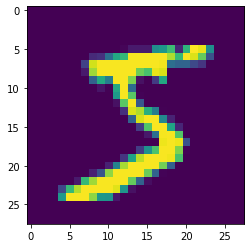

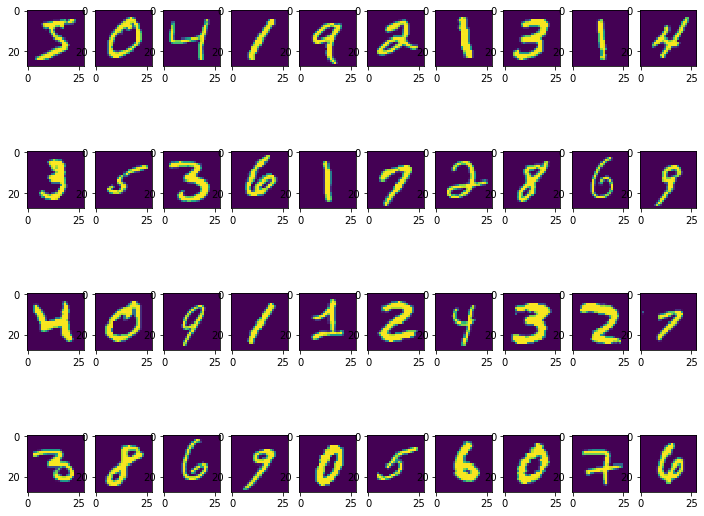

In [63]:
#preprocessing data
(x_train, y_train), (x_test, y_test1)=mnist.load_data()
print(x_train.shape,y_train.shape)  #(60000, 28, 28) (60000,)
image_size=x_train.shape[1]
#plot image
image_0=x_train[0]
plt.imshow(image_0)
print(y_train[0])

x_train=x_train.reshape((-1,image_size*image_size))  
x_test=x_test.reshape((-1,image_size*image_size))
print(x_train.shape , y_train.shape)  #(60000, 784) (60000,)
x_train=x_train.astype(dtype='float32')
x_test=x_test.astype(dtype='float32')
#print(y_train[:5])  #[5 0 4 1 9]

y_train=to_categorical(y_train)  #(60000,10)
y_test=to_categorical(y_test1)
y_train[0]


# preview the images
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)))
plt.show()

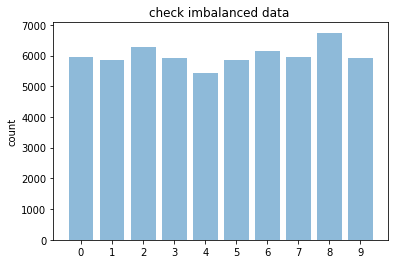

In [122]:
y_test1.shape
y_train.shape
type(y_train)
unique, counts = np.unique(y_train,return_counts=True,axis=0)
plt.bar(range(y_test.shape[1]), counts, align='center', alpha=0.5)
plt.xticks(range(y_test.shape[1]),range(y_test.shape[1]))
plt.ylabel('count')
plt.title('check imbalanced data ')
plt.show()


In [119]:
y_test.shape[1]

10

In [112]:
x_bar=np.array((range(10)))
x_bar.shape , counts.shape


((10,), (10,))

In [4]:
#hyper parameters
n_output=10      #len(np.unique(y_train))  :2 
n_input=image_size*image_size
hidden_layers=[256,256]   # we need 2 hidden layers ,each 256 units
activation_function='relu'

In [6]:
#no regularization

model=Sequential()
#add hidden layer 1
model.add(Dense(units=hidden_layers[0],input_dim=n_input,name='hidden_layer1'))
model.add(Activation(activation_function , name='relu_1'))
#add hidden layer 2
model.add(Dense(units=hidden_layers[1],name='hidden_layer2'))
model.add(Activation(activation_function , name='relu_2'))

#add output layer
model.add(Dense(units=n_output,name='output_layer'))
model.add(Activation('softmax' , name='softmax'))

model.summary()
plot_model(model=model,to_file='MNISt_mlp.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 256)               200960    
_________________________________________________________________
relu_1 (Activation)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
relu_2 (Activation)          (None, 256)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [7]:
#L2
model_L2=Sequential()
#add hidden layer 1
model_L2.add(Dense(units=hidden_layers[0],input_dim=n_input,name='hidden_layer1',kernel_regularizer=regularizers.l2(0.0001)))
model_L2.add(Activation(activation_function , name='relu_1'))
#add hidden layer 2
model_L2.add(Dense(units=hidden_layers[1],name='hidden_layer2',kernel_regularizer=regularizers.l2(0.0001)))
model_L2.add(Activation(activation_function , name='relu_2'))

#add output layer
model_L2.add(Dense(units=n_output,name='output_layer'))
model_L2.add(Activation('softmax' , name='softmax'))

model_L2.summary()
plot_model(model=model_L2,to_file='MNISt_mlp.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 256)               200960    
_________________________________________________________________
relu_1 (Activation)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
relu_2 (Activation)          (None, 256)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Dropout(0.25)
model_D=Sequential()
#add hidden layer 1
model_D.add(Dense(units=hidden_layers[0],input_dim=n_input,name='hidden_layer1'))
model_D.add(Activation(activation_function , name='relu_1'))
model_D.add(Dropout(0.25))
#add hidden layer 2
model_D.add(Dense(units=hidden_layers[1],name='hidden_layer2'))
model_D.add(Activation(activation_function , name='relu_2'))
model_D.add(Dropout(0.25))

#add output layer
model_D.add(Dense(units=n_output,name='output_layer'))
model_D.add(Activation('softmax' , name='softmax'))

model_D.summary()
plot_model(model=model_D,to_file='MNISt_mlp.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 256)               200960    
_________________________________________________________________
relu_1 (Activation)          (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
relu_2 (Activation)          (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
__________

In [11]:
#model.compile(optimizer='adam',loss='categorical_crossentropy')
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['acc'])
model_L2.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['acc'])
model_D.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['acc'])

In [13]:
#train the model
model_history=model.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 6s 108us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 7s 109us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 7s 111us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 7s 110us/step - loss: 14.3070 - acc: 0.1124 - val_lo

In [14]:
#train the model using Reularization : L2 
model_history_L2=model_L2.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 14.3121 - acc: 0.1132 - val_loss: 14.2992 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 14.3136 - acc: 0.1124 - val_loss: 14.2924 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 14.3090 - acc: 0.1124 - val_loss: 14.2895 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 14.3611 - acc: 0.1098 - val_loss: 14.6512 - val_acc: 0.1032
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 14.6550 - acc: 0.0993 - val_loss: 14.5553 - val_acc: 0.1032
Epoch 6/20
60000/60000 [==============================] - 8s 130us/step - loss: 14.5939 - acc: 0.0993 - val_loss: 14.5097 - val_acc: 0.1032
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 14.5568 - acc: 0.0993 - val_lo

In [15]:
#train the model using Reularization : Dropout
model_history_D=model_D.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 14.5103 - acc: 0.0997 - val_loss: 14.4869 - val_acc: 0.1012
Epoch 2/20
60000/60000 [==============================] - 9s 146us/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.4869 - val_acc: 0.1012
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 14.5114 - acc: 0.0997 - val_loss: 14.4869 - val_acc: 0.1012
Epoch 4/20
60000/60000 [==============================] - 9s 145us/step - loss: 14.5141 - acc: 0.0995 - val_loss: 14.4869 - val_acc: 0.1012
Epoch 5/20
60000/60000 [==============================] - 9s 158us/step - loss: 14.5100 - acc: 0.0998 - val_loss: 14.4869 - val_acc: 0.1012
Epoch 6/20
60000/60000 [==============================] - 9s 150us/step - loss: 14.5408 - acc: 0.0978 - val_loss: 14.5353 - val_acc: 0.0982
Epoch 7/20
60000/60000 [==============================] - 9s 144us/step - loss: 14.5487 - acc: 0.0974 - val_lo

In [22]:
#Early Stopping
model_history_E=model.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_data=(x_test, y_test),callbacks = [EarlyStopping(monitor='val_acc', patience=4)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 8s 125us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135


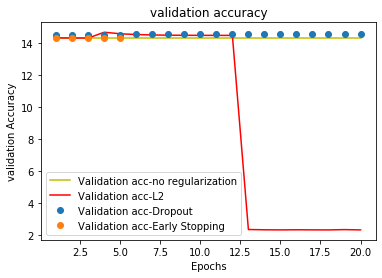

In [28]:
#plot loss and accuracy
#loss_values=model_history.history['loss']
val_loss_values=model_history.history['val_loss']
val_loss_values_L2=model_history_L2.history['val_loss']
val_loss_values_D=model_history_D.history['val_loss']
val_loss_values_E=model_history_E.history['val_loss']
plt.figure()
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs,val_loss_values,'y',label='Validation acc-no regularization')
plt.plot(epochs,val_loss_values_L2,'r',label='Validation acc-L2')
plt.plot(epochs,val_loss_values_D,'o',label='Validation acc-Dropout')
epochs_E = range(1, len(val_loss_values_E) + 1)
plt.plot(epochs_E,val_loss_values_E,'o',label='Validation acc-Early Stopping')
plt.title('validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('validation Accuracy')
plt.legend()
plt.show()

In [59]:
#prediction_D=model_D.predict_classes(x_test)  #(10000,)
prediction_D1=model_D.predict(x_test)  #(10000,10)
#param cls_true: corresponding true labels (9,)  ,  param cls_pred: corresponding true labels (9,)
cls_pred=np.argmax(prediction_D1,axis=1)
cls_true=y_test1  #y_test :categorical

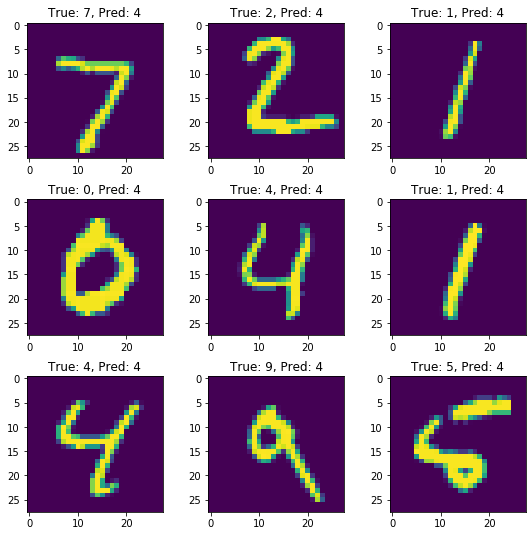

In [61]:
#Visualize correct and missclassified examples
fig, axes = plt.subplots(3, 3, figsize=(9, 9)) 
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i,ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28,28))   #array of images to be plotted, (9, img_h*img_w)
    ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
    ax.set_title(ax_title)